__Import Packages__

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

__Load and Convert data__

In [2]:
faces = np.load('./data/faces.npy')
ages = np.load('./data/ages.npy')
print(faces.shape)
print(ages.shape)

(7500, 48, 48)
(7500,)


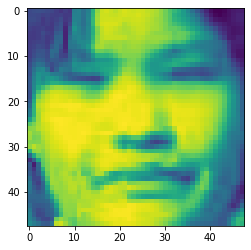

In [3]:
img_index = 2020
plt.imshow(faces[img_index])

In [4]:
faces = faces.astype('float32') / 255
faces = faces.reshape((faces.shape[0], 48, 48, 1))
ages = tf.keras.utils.to_categorical(ages)

In [5]:
faces_train = faces[0:6000]
faces_val = faces[6000:]
ages_train = ages[0:6000]
ages_val = ages[6000:]

__Build the Model__

In [17]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(2,2), padding='same', activation='relu', input_shape=(48,48,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
# model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2), padding='same', activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
# model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2), padding='same', activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
# model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(101, activation='softmax'))
# Take a look at the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 16)        80        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 32)        2080      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 32)        4128      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 32)         

In [18]:
# compile the model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [22]:
# train the model
model.fit(faces_train,
          ages_train,
          batch_size=32,
          epochs=10,
          validation_data=(faces_val, ages_val))

Train on 6000 samples, validate on 1500 samples
Epoch 1/10
6000/6000 [==============================] - 3s 551us/sample - loss: 2.3964 - accuracy: 0.3290 - val_loss: 4.4837 - val_accuracy: 0.0700
Epoch 2/10
6000/6000 [==============================] - 3s 547us/sample - loss: 2.1404 - accuracy: 0.3990 - val_loss: 4.7068 - val_accuracy: 0.0680
Epoch 3/10
6000/6000 [==============================] - 3s 545us/sample - loss: 1.8686 - accuracy: 0.4640 - val_loss: 4.9388 - val_accuracy: 0.0620
Epoch 4/10
6000/6000 [==============================] - 3s 556us/sample - loss: 1.6276 - accuracy: 0.5222 - val_loss: 5.3144 - val_accuracy: 0.0587
Epoch 5/10
6000/6000 [==============================] - 3s 563us/sample - loss: 1.4158 - accuracy: 0.5833 - val_loss: 5.4920 - val_accuracy: 0.0647
Epoch 6/10
6000/6000 [==============================] - 3s 542us/sample - loss: 1.2111 - accuracy: 0.6375 - val_loss: 6.1032 - val_accuracy: 0.0593
Epoch 7/10
6000/6000 [==============================] - 3s 552us

In [20]:
score = model.evaluate(faces_val, ages_val, verbose=0)

In [21]:
score[1]

0.06533334

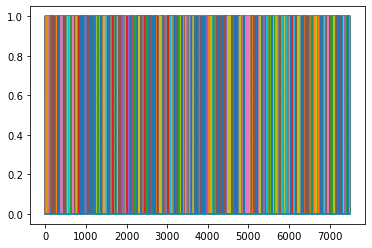

In [24]:
plt.plot(ages.)